In [54]:
from pathlib import Path
from typing import Union, Generator
from typing import List
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.animation as ani
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import plotly
from datetime import datetime
from datetime import timedelta
from typing import List
from pandas import Series,DataFrame
import matplotlib.animation as animation
from matplotlib.pylab import *
# we have two data from two webs
#gdp
# https://data.worldbank.org/indicator/NY.GDP.MKTP.KN?end=2019&start=1960  
#project2
# this data I select unemployeement rate/GDP/IMPORT/EMPORT
# https://tradingeconomics.com/country-list/gdp 

df = pd.read_excel (r'C:\Users\Administrator\Desktop\project2.xlsx')
print (df)

           EMPORT    Last  Previous  Reference    Unit         IMPORT   Last1  \
0       Argentina  140.00    150.00 2020-06-20  points      Argentina  112.00   
1         Armenia   98.40    106.00 2020-08-20  points        Armenia  100.00   
2       Australia  109.00    112.00 2020-06-20  points      Australia  111.00   
3      Azerbaijan  127.00     83.70 2020-12-17  points     Azerbaijan  123.00   
4      Bangladesh  237.00    226.00 2020-12-20  points     Bangladesh  277.00   
..            ...     ...       ...        ...     ...            ...     ...   
62         Turkey   91.52     90.73 2020-08-20  points         Turkey   84.54   
63         Uganda  156.00    151.00 2020-08-20  points         Uganda  130.00   
64        Ukraine   97.00     98.00 2020-07-20  points        Ukraine   97.60   
65  United States  123.00    122.00 2020-09-20  points  United States  124.00   
66        Vietnam  108.00    113.00 2020-12-19  points        Vietnam  107.00   

    Previous1 Reference1   

In [55]:
df.info() # check nan value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 20 columns):
EMPORT        67 non-null object
Last          67 non-null float64
Previous      67 non-null float64
Reference     67 non-null datetime64[ns]
Unit          67 non-null object
IMPORT        66 non-null object
Last1         66 non-null float64
Previous1     66 non-null float64
Reference1    66 non-null datetime64[ns]
Unit1         66 non-null object
UR            66 non-null object
Last2         66 non-null float64
Previous2     66 non-null float64
Reference2    66 non-null datetime64[ns]
Unit2         66 non-null object
GDP           66 non-null object
Last3         66 non-null float64
Previous3     66 non-null float64
Reference3    66 non-null datetime64[ns]
Unit3         66 non-null object
dtypes: datetime64[ns](4), float64(8), object(8)
memory usage: 10.6+ KB


In [56]:
df=df.dropna(axis=0,how='any')#delete all nan value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 66
Data columns (total 20 columns):
EMPORT        66 non-null object
Last          66 non-null float64
Previous      66 non-null float64
Reference     66 non-null datetime64[ns]
Unit          66 non-null object
IMPORT        66 non-null object
Last1         66 non-null float64
Previous1     66 non-null float64
Reference1    66 non-null datetime64[ns]
Unit1         66 non-null object
UR            66 non-null object
Last2         66 non-null float64
Previous2     66 non-null float64
Reference2    66 non-null datetime64[ns]
Unit2         66 non-null object
GDP           66 non-null object
Last3         66 non-null float64
Previous3     66 non-null float64
Reference3    66 non-null datetime64[ns]
Unit3         66 non-null object
dtypes: datetime64[ns](4), float64(8), object(8)
memory usage: 10.8+ KB


In [57]:
cols =['EMPORT','Last','Last1','Last2','Last3'] # rename the columns
df1 = df[cols]
df1=df1.rename(columns={'EMPORT':'Country','Last':'Emport','Last1':'Import',
                    'Last2':'Unemployeement_rate','Last3':'GDP'})

In [58]:
df1.info() # looks nice and claen

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 66
Data columns (total 5 columns):
Country                66 non-null object
Emport                 66 non-null float64
Import                 66 non-null float64
Unemployeement_rate    66 non-null float64
GDP                    66 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.1+ KB


In [59]:
p1=[]
p2=[]
w=0  #get the data of the country that we need
for i in df1['Country']:
    w=w+1
    if i=='Israel':
        p1.append(i)
        p2.append(df1['GDP'][w-1])
    if i=='Italy':
        p1.append(i)
        p2.append(df1['GDP'][w-1])
    if i=='France':
        p1.append(i)
        p2.append(df1['GDP'][w-1])
    if i=='Germany':
        p1.append(i)
        p2.append(df1['GDP'][w-1])
  

<IPython.core.display.Javascript object>


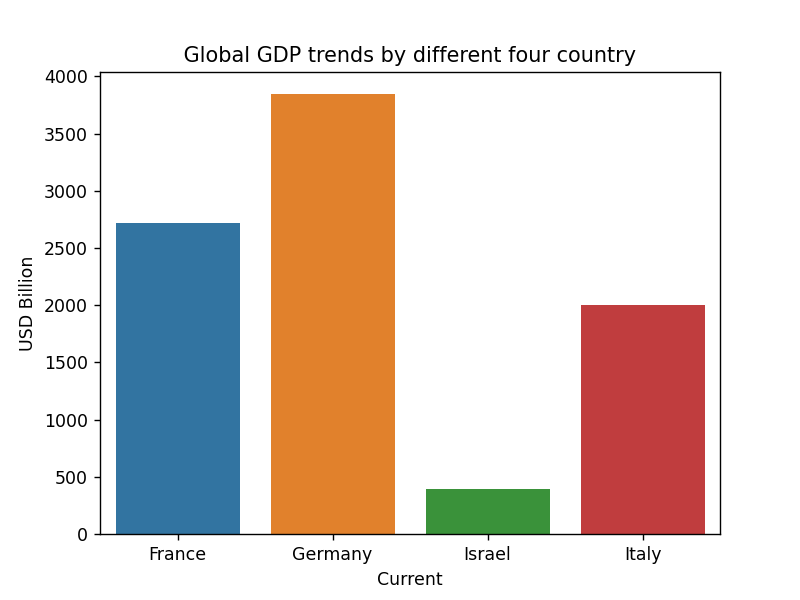

In [60]:
plt.xlabel("Current")  #if you want to add more plot, let me konw.
plt.ylabel("USD Billion") # best way is give me some details.
plt.title(" Global GDP trends by different four country ")
sns.barplot(x=p1,y=p2,data=df)

In [63]:

total=0 # prepare for pie chart
sizes=[]
for i in range(4): #Calculate the total GDP of there 3 countries
    total=total+p2[i]

for w in range(4):
    sizes.append(int(p2[w]/total*100)) # Calculate % of each country in this 4 countries


<IPython.core.display.Javascript object>


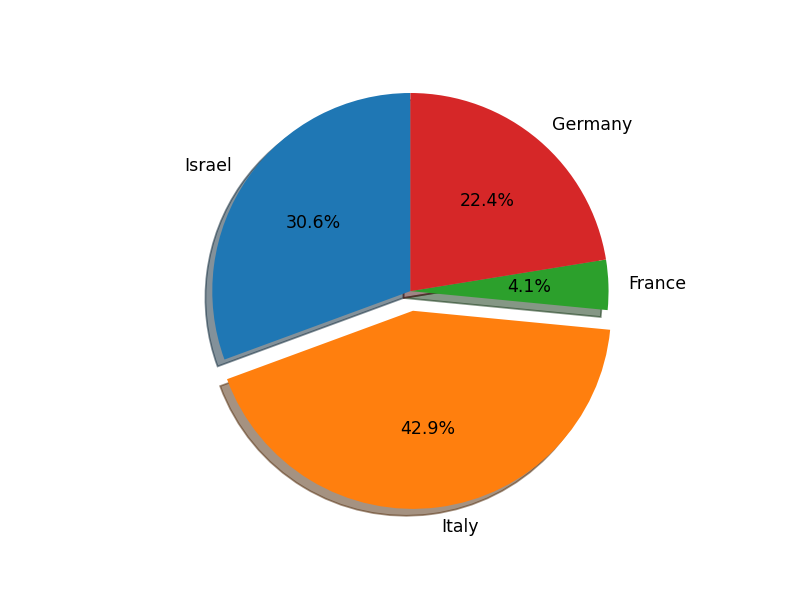

In [65]:
labels = 'Israel', 'Italy', 'France', 'Germany'
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Italy')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [66]:
df3 = pd.read_csv('gdp.csv') # there is the GDP data by year
df3.set_index("Country Name", inplace = True) 
col=["Country Code","Indicator Name","Indicator Code","Region",
    "IncomeGroup","SpecialNotes","TableName" ]  
df3.drop(col, inplace=True, axis=1) # Clean up some data 
df3=df3/100000000 # make it readerble
df3.dropna(axis=0,how='any')# delect the nan value

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Australia,185.776683,196.528167,198.924852,215.074476,237.641393,259.368350,272.684511,303.975809,326.654721,366.289618,...,11461.400000,13966.500000,15461.500000,15761.800000,14674.800000,13516.900000,12088.500000,13301.400000,14339.000000,13926.800000
Austria,65.926938,73.117496,77.561102,83.741753,91.699839,99.940706,108.876823,115.794317,124.406253,135.827986,...,3918.930000,4311.200000,4094.250000,4300.690000,4419.960000,3818.180000,3952.280000,4183.160000,4555.080000,4463.150000
Burundi,1.960000,2.030000,2.135000,2.327500,2.607500,1.589950,1.654446,1.782971,1.832000,1.902057,...,20.321352,22.358209,23.333081,24.516253,27.057833,31.043949,29.596410,31.722924,30.369318,30.123349
Belgium,116.587226,124.001452,132.640157,142.600174,159.601067,173.714576,186.518835,199.920408,213.763531,237.107359,...,4809.520000,5226.460000,4961.810000,5216.430000,5346.780000,4621.500000,4759.010000,5037.890000,5426.860000,5296.070000
Benin,2.261956,2.356682,2.364349,2.539276,2.698190,2.899087,3.029253,3.062220,3.263231,3.307482,...,95.353443,106.933220,111.413589,125.178457,132.845287,113.881610,118.210662,127.016569,142.509860,143.907091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
St. Vincent and the Grenadines,0.130666,0.139999,0.145249,0.137082,0.147582,0.151082,0.160999,0.158352,0.153500,0.166500,...,6.812259,6.761296,6.929333,7.212074,7.277148,7.554000,7.744296,7.921778,8.113000,8.253852
World,13694.300000,14251.100000,15300.600000,16482.900000,18056.600000,19662.600000,21333.300000,22709.400000,24514.300000,27046.300000,...,661131.000000,734483.000000,751460.000000,773020.000000,794508.000000,751988.000000,763358.000000,812292.000000,863571.000000,876975.000000
South Africa,75.753970,79.729968,84.979966,94.233962,103.739959,113.343955,123.549951,137.773945,148.945940,167.803933,...,3753.490000,4164.190000,3963.330000,3668.290000,3509.050000,3176.210000,2963.570000,3495.540000,3682.890000,3514.320000


In [67]:
df3 = df3.transpose() # index becomes the table name
col=['Israel', 'Italy','France','Germany'] # select the 4 countries
df4=df3[col]

In [68]:
df4.head()

Country Name,Israel,Italy,France,Germany
1960,25.985000,403.852883,622.254780,NaN
1961,31.385000,448.427603,674.616442,NaN
1962,25.100000,503.838919,756.075298,NaN
1963,29.923333,577.107431,847.591951,NaN
1964,34.053333,631.754170,940.078510,NaN


In [69]:
x1 = df4['Israel']
x2 = df4['Italy']
x3 = df4['France']
x4 = df4['Germany']

<IPython.core.display.Javascript object>


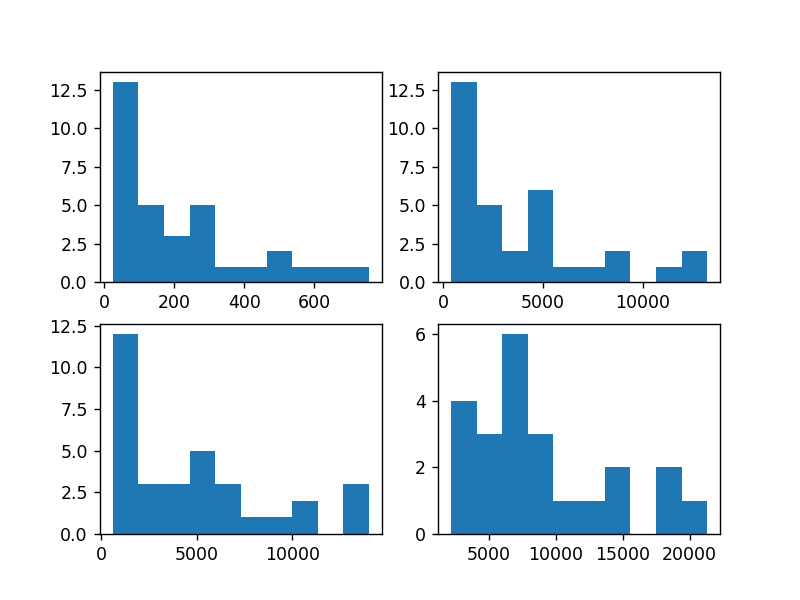

In [72]:
# show the annual changes in GPD of 4 countries
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

def updateData(curr):
    if curr <=2: return
    for ax in (ax1, ax2, ax3, ax4):
        ax.clear()
    ax1.hist(x1[:curr]) # first row Israel and Italy
    ax2.hist(x2[:curr]) #
    ax3.hist(x3[:curr]) # Second row France and Germany
    ax4.hist(x4[:curr]) #

plt.xlabel("1960-2019")  #
plt.ylabel("USD Billion") 
plt.title(" four countries' GDP move by each year")

simulation = animation.FuncAnimation(fig, updateData, interval=50, repeat=False)

plt.show()

<IPython.core.display.Javascript object>


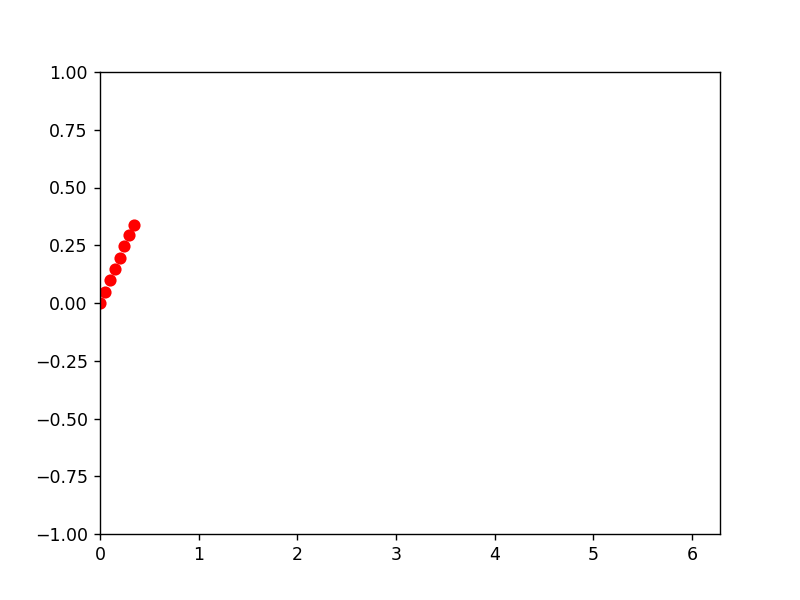

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()